<a href="https://colab.research.google.com/github/Mart-eng/baby-names/blob/main/baby_names.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
# data from https:data.cityofnewyork.us/Health/Popular-Baby-Names/25th-nujf
data = pd.read_csv("https://data.cityofnewyork.us/api/views/25th-nujf/rows.csv")
data
# count denotes the number of babies with that name
# rank denotes the frequency of baby names

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,FEMALE,HISPANIC,GERALDINE,13,75
1,2011,FEMALE,HISPANIC,GIA,21,67
2,2011,FEMALE,HISPANIC,GIANNA,49,42
3,2011,FEMALE,HISPANIC,GISELLE,38,51
4,2011,FEMALE,HISPANIC,GRACE,36,53
...,...,...,...,...,...,...
39467,2019,FEMALE,BLACK NON HISPANIC,Sanai,10,34
39468,2019,FEMALE,BLACK NON HISPANIC,Sariyah,10,34
39469,2019,FEMALE,BLACK NON HISPANIC,Sevyn,10,34
39470,2019,FEMALE,BLACK NON HISPANIC,Zariah,10,34


In [58]:
# rename the "Child's First Name" column to make it easier to work with and standardize names
data.rename(columns={"Child's First Name":"Name"}, inplace=True)

# I found that there was a duplicate problem when making the graphs so I came back to fix it
data = data.drop_duplicates()
data["Name"] = data["Name"].str.title()
data

# The dataset has also been updated, removing the updated year(s)
data = data[data['Year of Birth'] != 2019]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [59]:
# Check for any missing values
data.isnull().sum()

Year of Birth    0
Gender           0
Ethnicity        0
Name             0
Count            0
Rank             0
dtype: int64

In [60]:
data['Year of Birth'].value_counts()

2014    2075
2016    2063
2015    2045
2013    2031
2012    2004
2017    1973
2011    1963
Name: Year of Birth, dtype: int64

In [61]:
data.shape

(14154, 6)

In [62]:
data.dtypes

Year of Birth     int64
Gender           object
Ethnicity        object
Name             object
Count             int64
Rank              int64
dtype: object

In [63]:
# get all the boy names and all the girl names
boys = data[data['Gender'] == 'MALE']
girls = data[data['Gender'] == 'FEMALE']

In [64]:
data["Gender"].value_counts()

FEMALE    7230
MALE      6924
Name: Gender, dtype: int64

In [65]:
# get the most popular boy name for each year
boyFrame1 = boys.groupby(["Year of Birth", "Name"])["Count"].max().sort_values(ascending=False).head(12).to_frame("Count").sort_values("Year of Birth")
boyFrame1 = boyFrame1.reset_index()

# drop the unnecessary rows
boyFrame1 = boyFrame1.drop([1,6,7,9,10])
boyFrame1 = boyFrame1.reset_index()
boyFrame1 = boyFrame1.drop(['index'],axis=1)
boyFrame1

,Year of Birth,Name,Count
0,2011,Jayden,426
1,2012,Jayden,364
2,2013,Jayden,352
3,2014,Liam,312
4,2015,Liam,356
5,2016,Liam,387
6,2017,Liam,407


In [66]:
# get the most popular girl name for each year
girlFrame1 = girls.groupby(["Year of Birth", "Name"])["Count"].max().sort_values(ascending=False).head(10).to_frame("Count").sort_values("Year of Birth")
girlFrame1 = girlFrame1.reset_index()

# drop the unnecessary rows
girlFrame1 = girlFrame1.drop([3,6,8])
girlFrame1 = girlFrame1.reset_index()
girlFrame1 = girlFrame1.drop(['index'], axis=1)
girlFrame1

,Year of Birth,Name,Count
0,2011,Isabella,331
1,2012,Isabella,327
2,2013,Isabella,326
3,2014,Isabella,331
4,2015,Isabella,307
5,2016,Isabella,276
6,2017,Esther,260


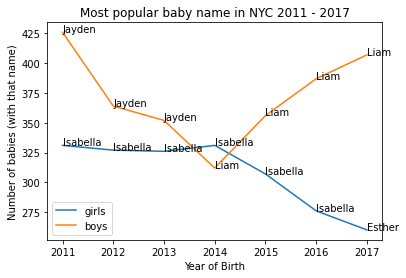

In [67]:
import matplotlib.pyplot as plt
# graph showing popular boy and girl names
# plot points and names

x = girlFrame1["Year of Birth"].to_list()
y = girlFrame1["Count"].to_list()
names = girlFrame1["Name"].to_list()

# plot for graph
fig, ax = plt.subplots()
ax.plot(x, y, label= "girls")

# this puts the names at each point on the graph
for i, txt in enumerate(names):
    ax.annotate(txt, (x[i], y[i]))

x1 = boyFrame1["Year of Birth"].to_list()
y1 = boyFrame1["Count"].to_list()
names1 = boyFrame1["Name"].to_list()

ax.plot(x1, y1, label= "boys")
for i, txt in enumerate(names1):
    ax.annotate(txt, (x1[i], y1[i]))

plt.xlabel("Year of Birth")
plt.ylabel("Number of babies (with that name)")
ax.set_title("Most popular baby name in NYC 2011 - 2017")
plt.legend()

In [68]:
# Births of boys by year
boy_births = boys.groupby("Year of Birth").size()

# Births of girls by year
girl_births = girls.groupby("Year of Birth").size()

print("Girl births:", girl_births)
print("Boy births:", boy_births)

Girl births: Year of Birth
2011    1004
2012    1023
2013    1031
2014    1069
2015    1044
2016    1047
2017    1012
dtype: int64
Boy births: Year of Birth
2011     959
2012     981
2013    1000
2014    1006
2015    1001
2016    1016
2017     961
dtype: int64


Text(0.5, 1.0, 'Number of babies born in NYC')

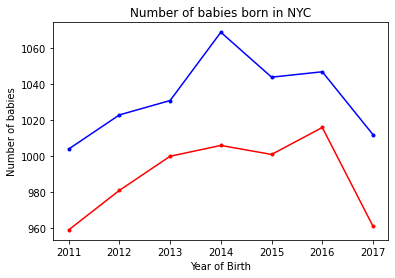

In [69]:
# Graph showing number of births of boys and girls

fig2, ax2 = plt.subplots()
ax2.plot(x1, boy_births, 'r.-', label= "Boys")
ax2.plot(x1, girl_births, 'b.-', label= "Girls")
plt.xlabel("Year of Birth")
plt.ylabel("Number of babies")
plt.title("Number of babies born in NYC")


In [71]:
# Data for a top 3 boy names per year chart
boyFrame2 = boys.groupby(["Year of Birth", "Name"])["Count"].max().sort_values(ascending=False).head(30
                        ).to_frame("Count").sort_values(["Year of Birth", "Count"], ascending=False)
boyFrame2 = boyFrame2.reset_index()

#Dropping rows in excess of 3 names per year
boyFrame2 = boyFrame2.drop([6,10,11,12,13,17,21,25,29])
boyFrame2 = boyFrame2.reset_index()
boyFrame2 = boyFrame2.drop("index", axis=1)
boyFrame2

,Year of Birth,Name,Count
0,2017,Liam,407
1,2017,Jacob,290
2,2017,Dylan,287
3,2016,Liam,387
4,2016,Jacob,351
5,2016,Dylan,312
6,2015,Liam,356
7,2015,Dylan,339
8,2015,Ethan,332
9,2014,Liam,312


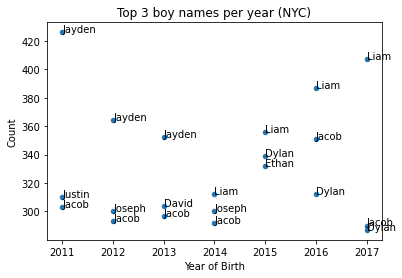

In [73]:
fig3, ax3 = plt.subplots()
boyFrame2.plot(x= "Year of Birth", y= "Count", kind= "scatter", ax= ax3)
ax3.set_title("Top 3 boy names per year (NYC)")

for i, name in enumerate(boyFrame2["Name"].to_list()):
    ax3.annotate(name, (boyFrame2["Year of Birth"][i], boyFrame2["Count"][i]))

In [75]:
# Data for a top 3 girl names per year chart
girlFrame2 = girls.groupby(["Year of Birth", "Name"])["Count"].max().sort_values(ascending=False
                          ).head(31).to_frame("Count").sort_values(["Year of Birth", "Count"], ascending=False)
girlFrame2 = girlFrame2.reset_index()

# Drop names so only top 3 names for year
girlFrame2 = girlFrame2.drop([3,4,8,12,13,17,18,19,23,24])
girlFrame2 = girlFrame2.reset_index()
girlFrame2 = girlFrame2.drop("index", axis=1)
girlFrame2

,Year of Birth,Name,Count
0,2017,Esther,260
1,2017,Mia,250
2,2017,Isabella,245
3,2016,Isabella,276
4,2016,Sophia,261
5,2016,Olivia,230
6,2015,Isabella,307
7,2015,Sophia,269
8,2015,Mia,257
9,2014,Isabella,331


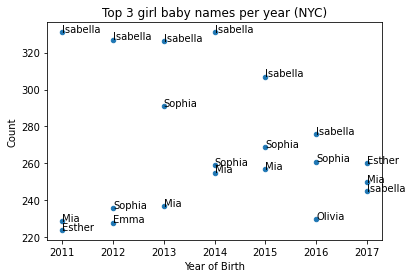

In [76]:
fig4, ax4 = plt.subplots()
girlFrame2.plot(x= "Year of Birth", y= "Count", kind= 'scatter', ax=ax4)
ax4.set_title("Top 3 girl baby names per year (NYC)")

for i, name in enumerate(girlFrame2["Name"].to_list()):
    ax4.annotate(name, (girlFrame2["Year of Birth"][i], girlFrame2["Count"][i]))